In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_telco, scale_telco_data, get_data_from_sql, get_db_url

In [4]:
 train, validate, test = wrangle_telco()

In [5]:
def plot_variable_pairs(df):
    g = sns.PairGrid(df)
    g.map_diag(sns.distplot)
    g.map_offdiag(sns.regplot, scatter_kws={"color": "dodgerblue"}, line_kws={"color": "orange"})
    return g

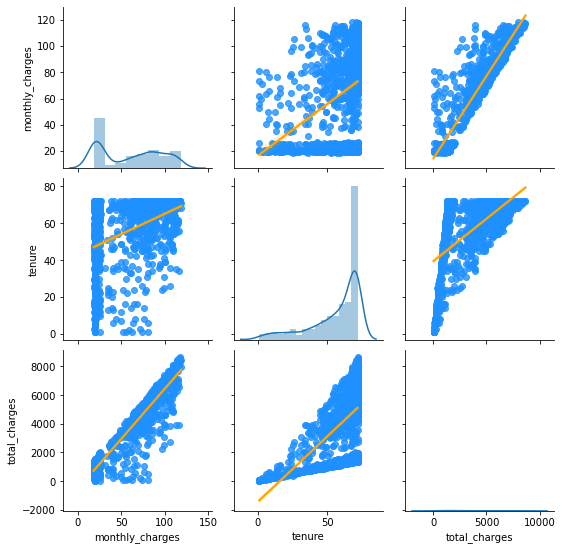

In [6]:
plot_variable_pairs(train)

In [26]:
def months_to_years(df):
    df['months_to_years'] = (df.tenure / 12).round()
    df['is_tenured'] = df.months_to_years >= 1
    df['amount_spent'] = pd.cut(df.total_charges, bins = [0, 500, 1000, 1500, 2000, 3000, 4000, 5000], labels= ['new_customer','greater_than_500', 'greater_than_1k', 'greater_than_1.5', 'greater_than_2k', 'greater_than_3k', 'greater_than_4k'])
    return df

In [27]:
train = months_to_years(train)
train.head()

,customer_id,monthly_charges,tenure,total_charges,months_to_years,is_tenured,amount_spent
1171,6980-IMXXE,20.20,69,1412.65,6.0,True,greater_than_1k
736,4573-JKNAE,19.35,12,212.30,1.0,True,new_customer
1485,8774-GSBUN,25.40,72,1797.10,6.0,True,greater_than_1.5
1139,6770-UAYGJ,25.25,49,1211.65,4.0,True,greater_than_1k
689,4139-DETXS,64.45,72,4528.00,6.0,True,greater_than_4k


In [32]:
def plot_categorical_and_continuous_vars(df , x, y):
    sns.heatmap(df.corr(), cmap = 'Purples', annot = True)
    plt.show()
    sns.swarmplot(data= df, x = x, y = y)
    plt.show()
    sns.barplot(data= df, x = x, y = y)
    plt.show()
    return x, y

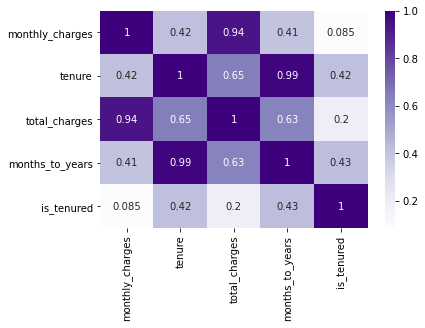

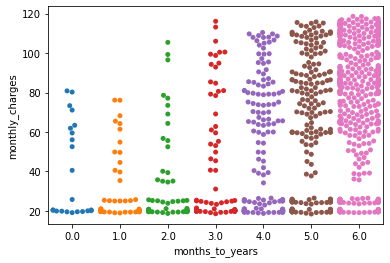

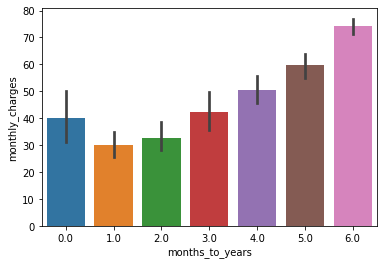

('months_to_years', 'monthly_charges')

In [33]:
plot_categorical_and_continuous_vars(train , 'months_to_years', 'monthly_charges')